<a href="https://colab.research.google.com/github/Ignaciojeda/ProyectoCSSCrisDm/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

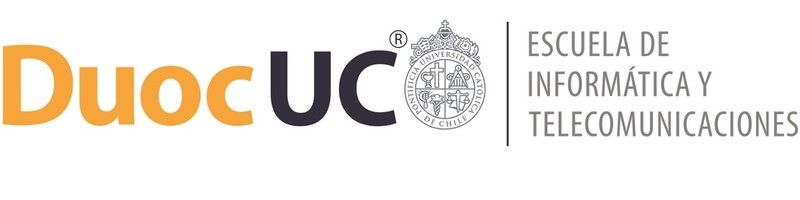

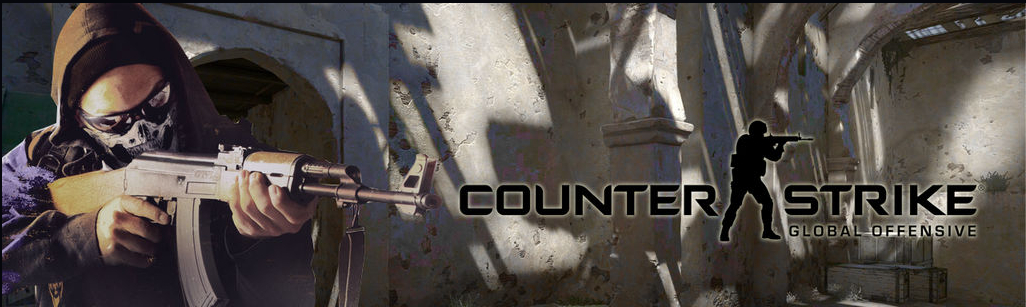

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: Alan Barria
* Sebastián Navarro
* Ignacio Ojeda

Docente: Giocrisrai

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

# Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación


## 1. Objetivo del negocio


Valve busca mejorar la experiencia del jugador para el juego "Counter Strike: Global Offensive" (CSGO) asi que se busca entender mejor el comportamiento del jugador y poder predecir los momentos claves dentro de este ya sea ganar una ronda, sobrevivir la ronda, estar un mayor tiempo con vida, etc

##2. Evaluación de la situacion

Contamos con un dataset con mas de 79000 registro sobre 7000 partidas del juego csgo con 10 jugadores por partida.

Cada fila representando un jugador en una partida o ronda con 29 columnas de informacion

Toda esta informacion ha sido extraida de replays procesadas de manera automatica, lo que puede provocar que haya datos abnormales ya sean errores en la lectura de esto o sesgos de informacion

Ademas de esto Valve no nos ha definido un problema en especifico asi que tenemos libertad para, explorar los datos y proponer problemas predictivos ya sean ganar una ronda, salir vivo o ver algun comportamiento extraño como por ejemplo encontrar un cheater todo esto para buscar una mejora en la experiencia del jugador


## 3. Objetivos del proyecto Data Mining

En este proyecto se desarrollara un analisis exploratorio de datos, con los siguientes objetivos:

Realizar un analisis exploratorio para entender la distribucion de las variables, las correlaciones y diferencias entre los equipos y mapas

Buscar patrones de juego entre los jugadores que ganen o pierdan rondas, sobrevivan o mueran, o ver que armas o utilidades estan comprando

Desarrollar modelos predictivos para saber si:

Ganaran o perderan la ronda/partida

Sobreviviran o no a la ronda

Saber que equipo tiene mayor posibilidad de ganar por mapa

Evaluar la integridad de los datos


## 4. Plan de accion


Dentro de las acciones que tomaremos estan:

Entendimiento de los datos: Revision del contexto del juego y el significado de cada una de las variables

Revision y Limpieza de datos: Buscar y eliminar valores nulos , ver outliers y datos abnormales

Analisis exploratorio de datos: Ver y analizar estadisticas para detectar patrones, correlaciones y diferencias entre equipos, mapas y resultados

Entrenamiento de modelos de Machine Learning

Propuestas para el negocio: Recomendaciones para balance de partidas, Mejorar la experiencia del jugador y detectar actividades sospechosas


# Fase 2: Data Understanding

## Carga de Librerías y Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/TG_Machine_Learning/Anexo ET_demo_round_traces_2022.csv'
# Cargar los datos
try:
    data = pd.read_csv(url, sep=";", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados exitosamente!


*En esta primera parte nos encargamos de cargar el dataset con el cual trabajaremos*

## Exploración Inicial de los Datos

In [ ]:
# Mostrar las primeras filas
print(data.head(30))

    Unnamed: 0         Map              Team  InternalTeamId  MatchId  \
0          600  de_inferno         Terrorist               1        4   
1          601  de_inferno         Terrorist               1        4   
2          602  de_inferno         Terrorist               1        4   
3          603  de_inferno         Terrorist               1        4   
4          604  de_inferno         Terrorist               1        4   
5          605  de_inferno  CounterTerrorist               2        4   
6          606  de_inferno  CounterTerrorist               2        4   
7          607  de_inferno  CounterTerrorist               2        4   
8          608  de_inferno  CounterTerrorist               2        4   
9          609  de_inferno  CounterTerrorist               2        4   
10         610  de_inferno         Terrorist               1        4   
11         611  de_inferno         Terrorist               1        4   
12         612  de_inferno         Terrorist       

In [ ]:
# Información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
# Estadísticas descriptivas
print(data.describe())

          Unnamed: 0  InternalTeamId       MatchId       RoundId  \
count   79157.000000    79157.000000  79157.000000  79157.000000   
mean    60570.193640        1.500006    250.525033     12.765517   
std     36436.598386        0.500003    149.557804      7.432837   
min       600.000000        1.000000      4.000000      1.000000   
25%     30830.000000        1.000000    128.000000      6.000000   
50%     56720.000000        2.000000    236.000000     12.000000   
75%     90639.000000        2.000000    373.000000     19.000000   
max    123779.000000        2.000000    511.000000     36.000000   

       RLethalGrenadesThrown  RNonLethalGrenadesThrown  PrimaryAssaultRifle  \
count           79157.000000              79157.000000         79157.000000   
mean                0.498667                  1.258057             0.675363   
std                 0.597985                  1.184909             0.464125   
min                 0.000000                  0.000000             0.00

In [ ]:
# Tamaño del dataset
print(f"El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas")

El dataset tiene 79157 filas y 30 columnas


## 3. Análisis de Variables Individuales


Distribución de Map:
Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64


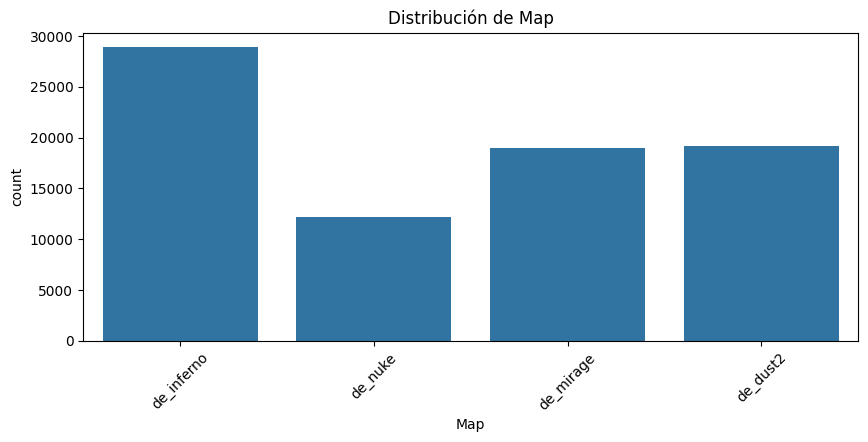


Distribución de Team:
Team
Terrorist           39591
CounterTerrorist    39564
Name: count, dtype: int64


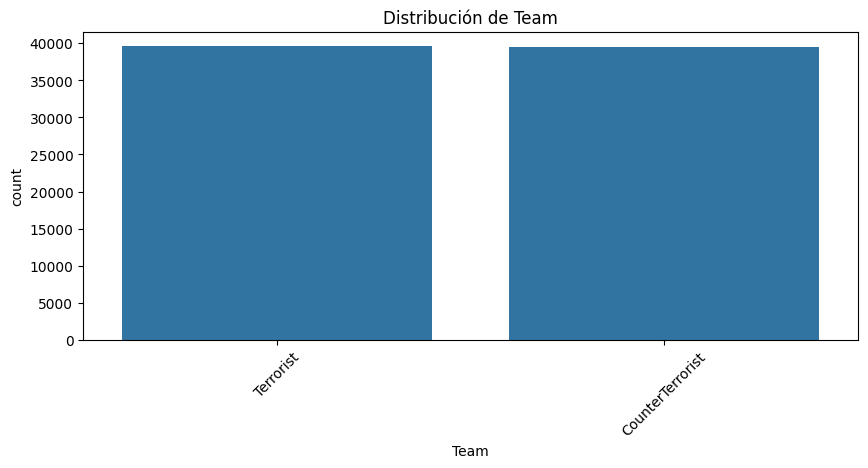


Distribución de MatchWinner:
MatchWinner
False    42017
True     37139
Name: count, dtype: int64


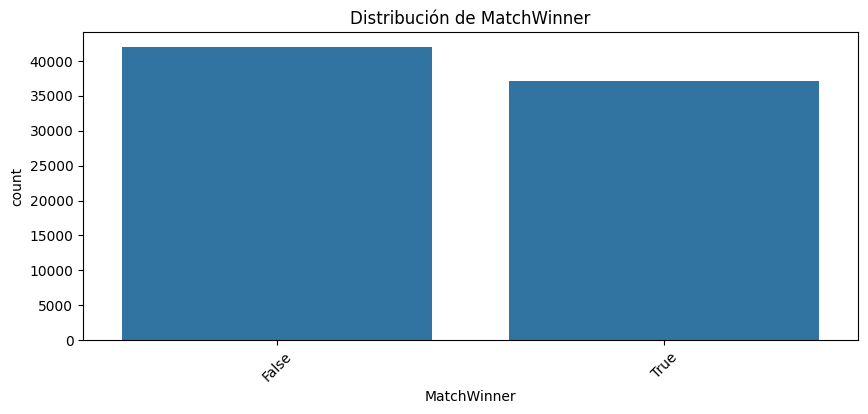


Distribución de RoundWinner:
RoundWinner
False     39588
True      39568
False4        1
Name: count, dtype: int64


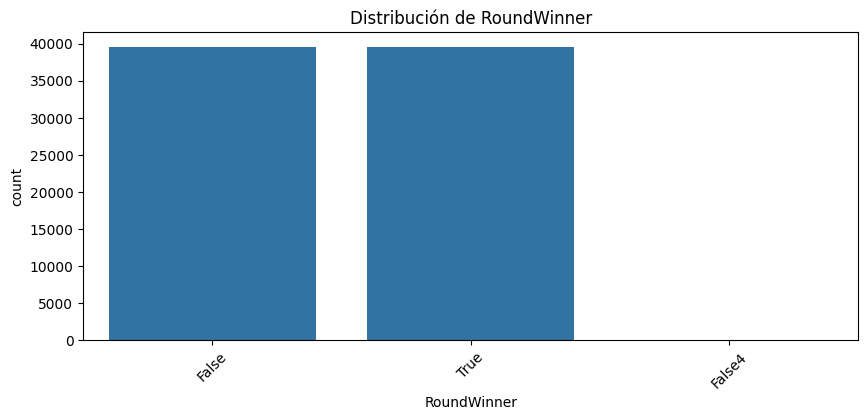


Distribución de Survived:
Survived
False    47214
True     31943
Name: count, dtype: int64


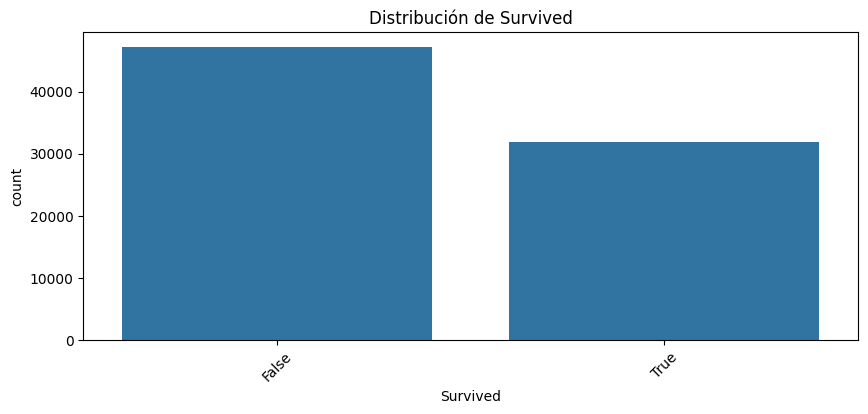


Distribución de AbnormalMatch:
AbnormalMatch
False    79157
Name: count, dtype: int64


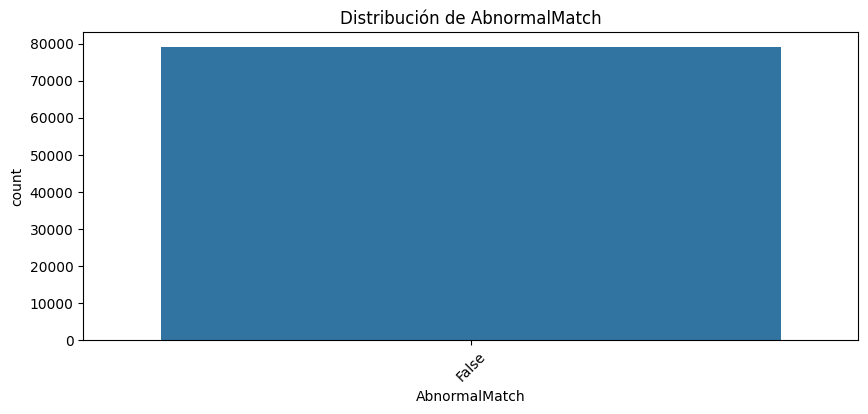

In [ ]:
# Análisis de variables categóricas
categorical_cols = ['Map', 'Team', 'MatchWinner', 'RoundWinner', 'Survived', 'AbnormalMatch']
for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(data[col].value_counts())
    plt.figure(figsize=(10,4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()


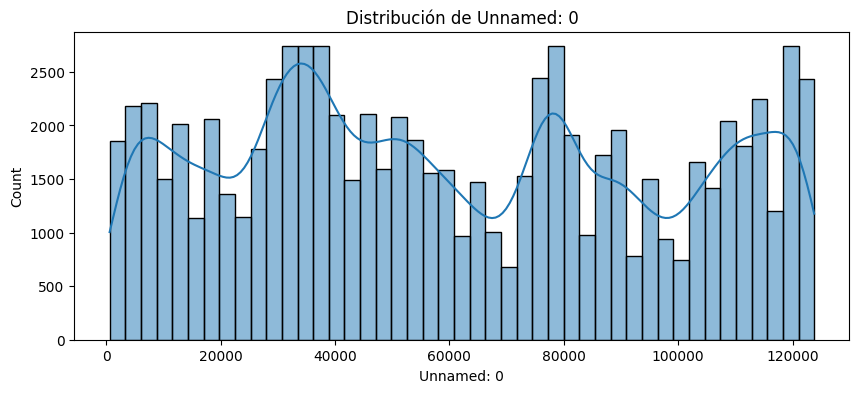

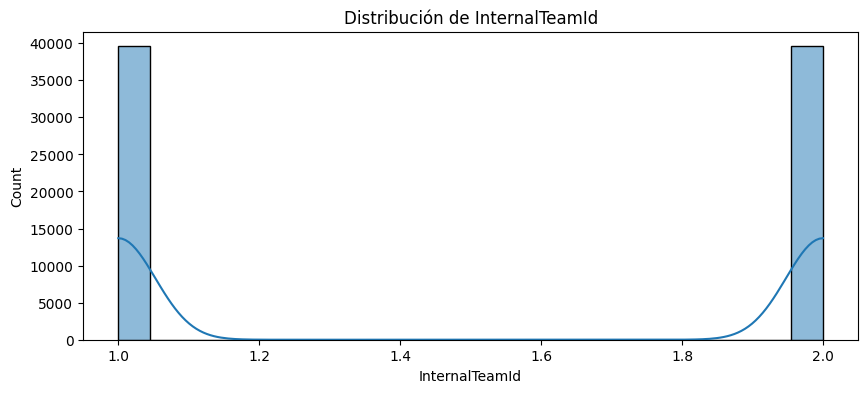

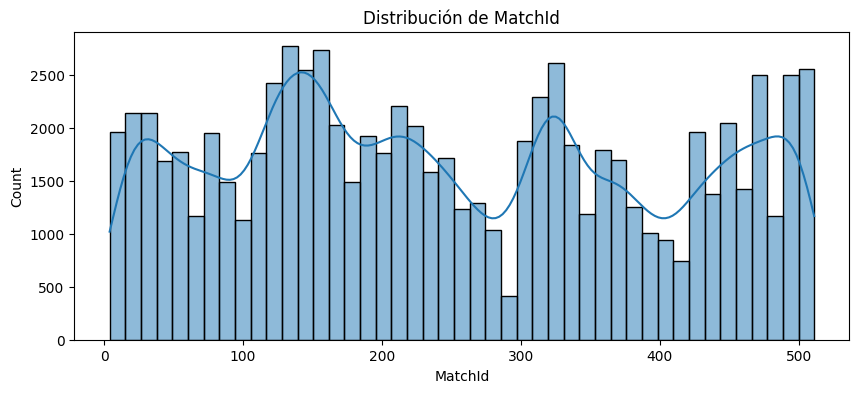

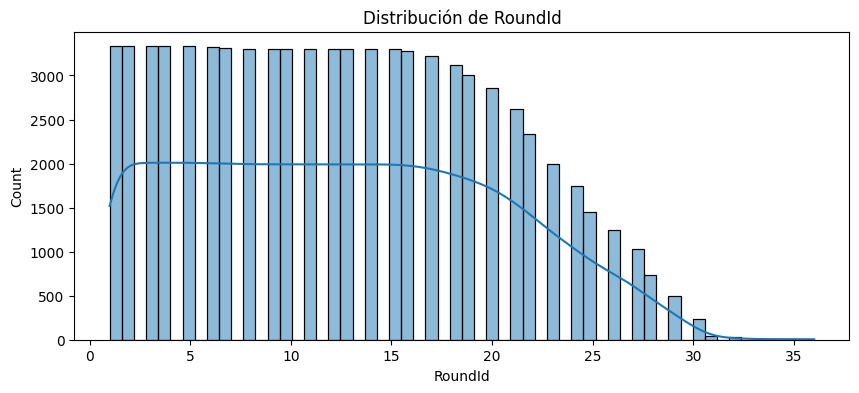

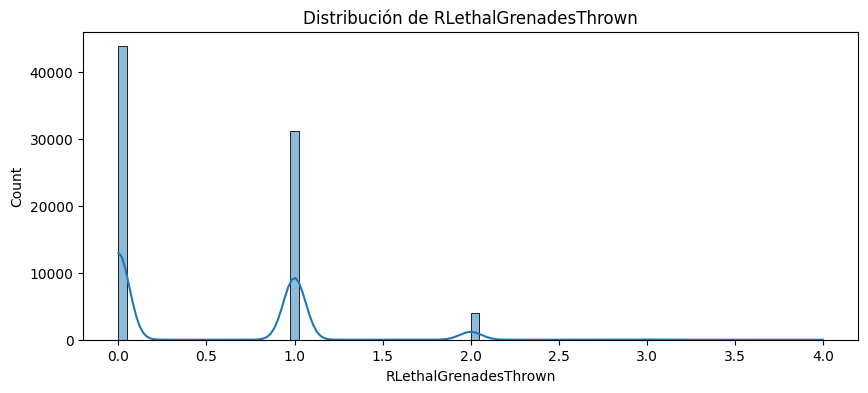

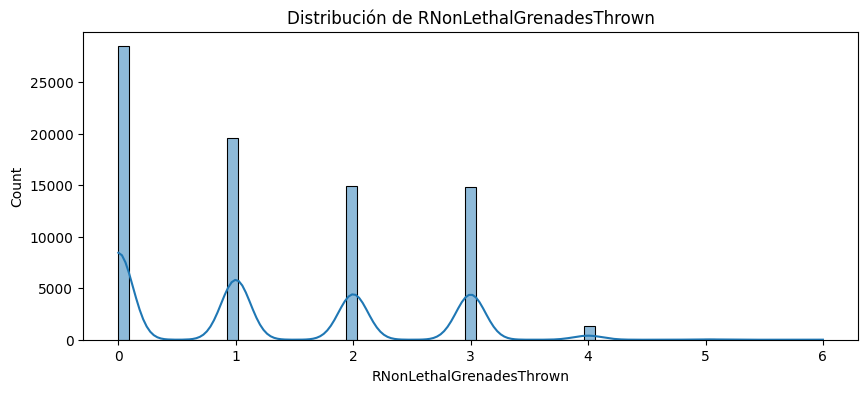

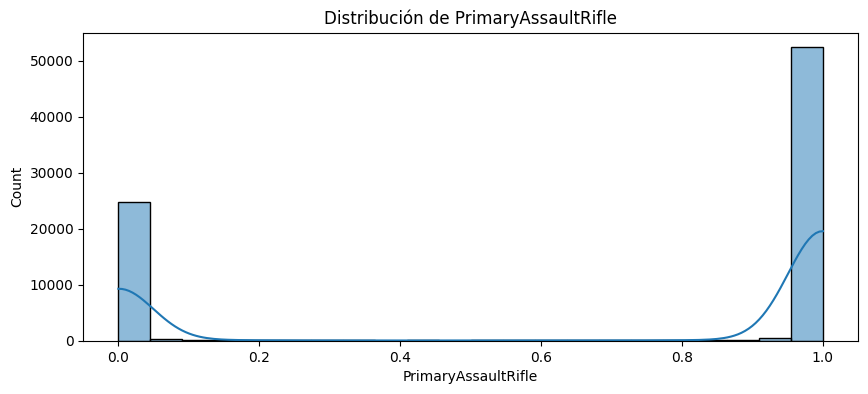

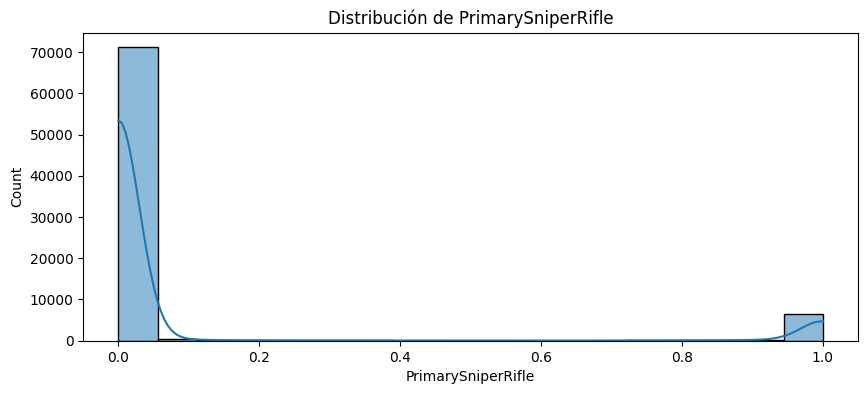

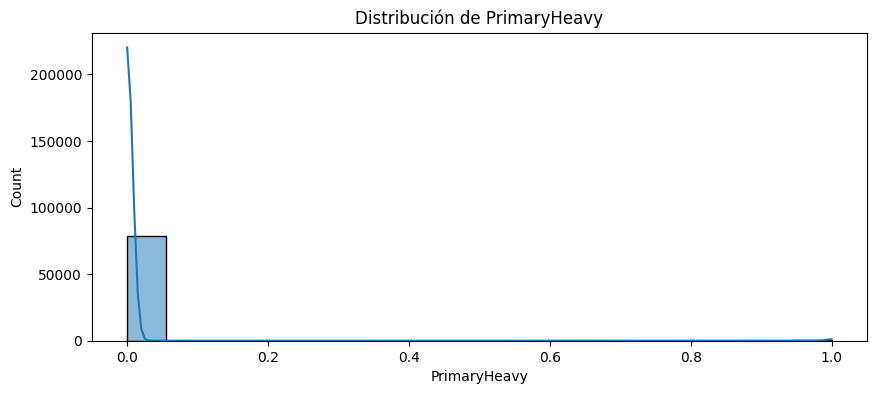

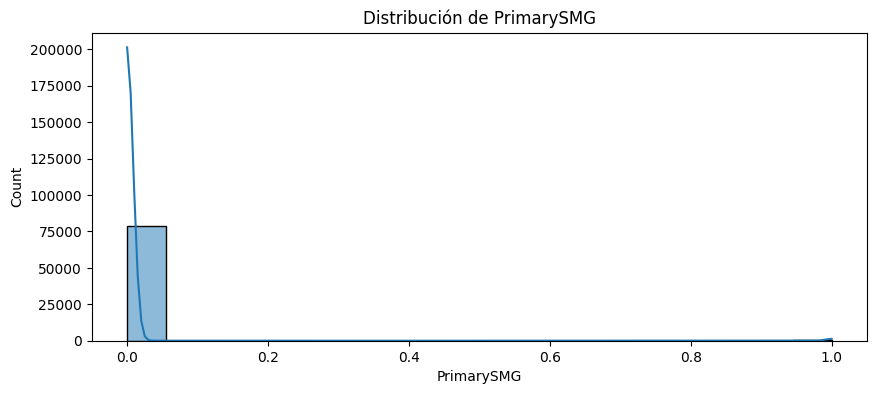

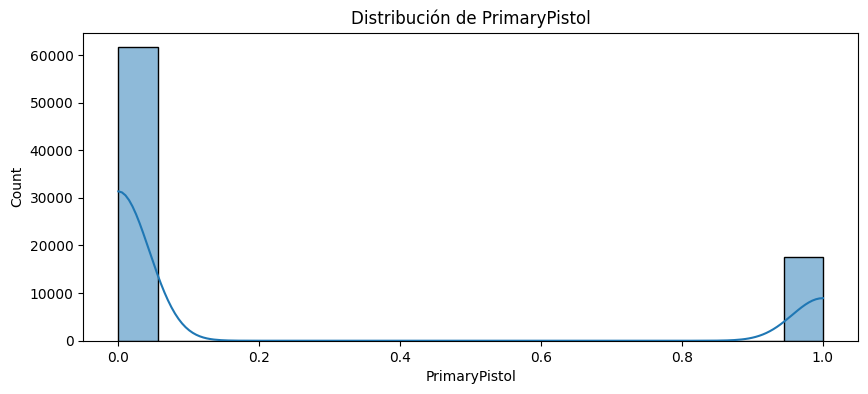

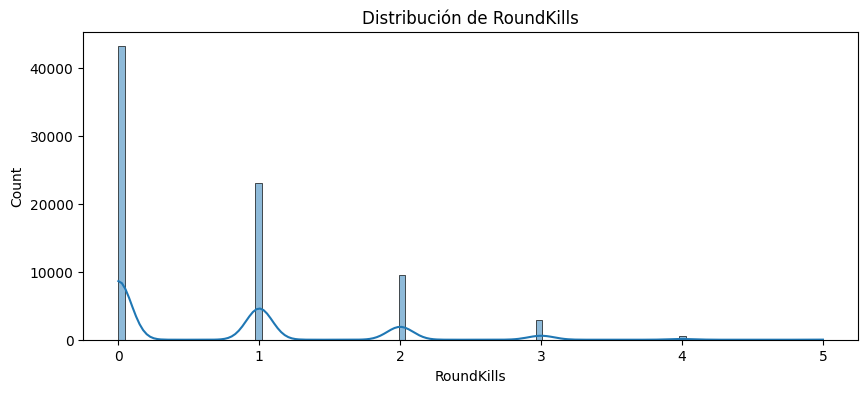

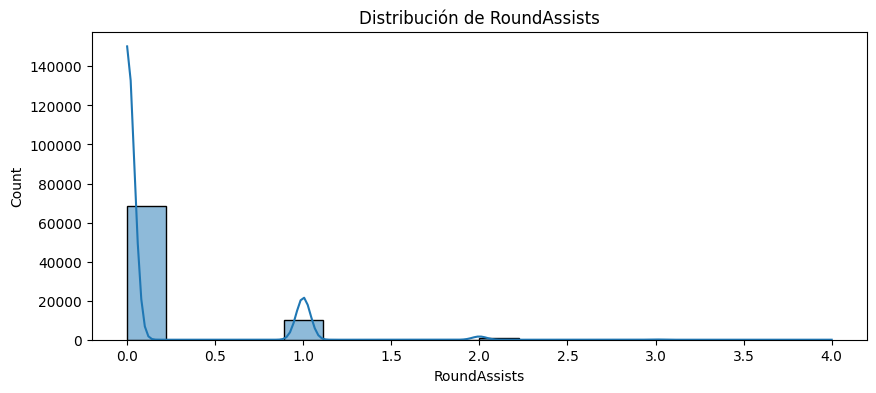

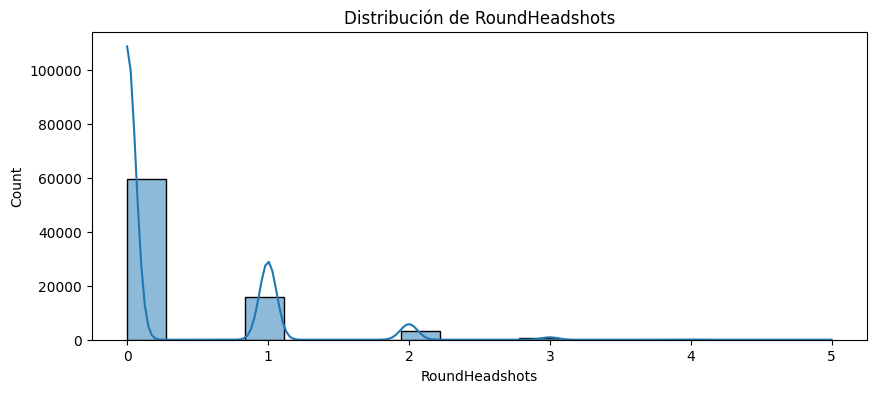

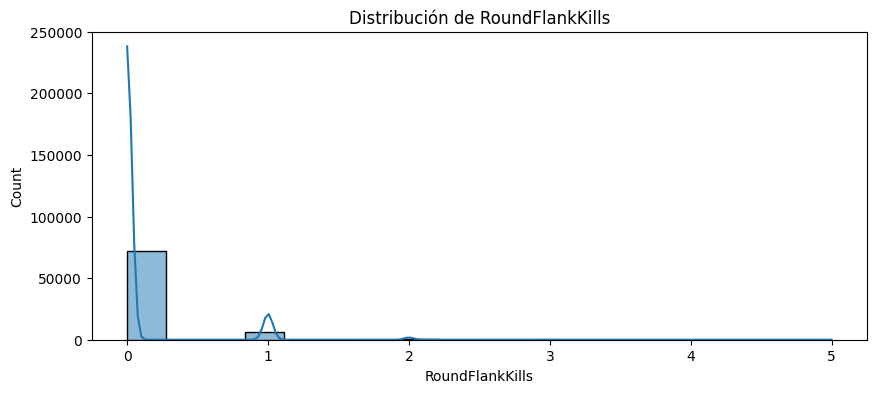

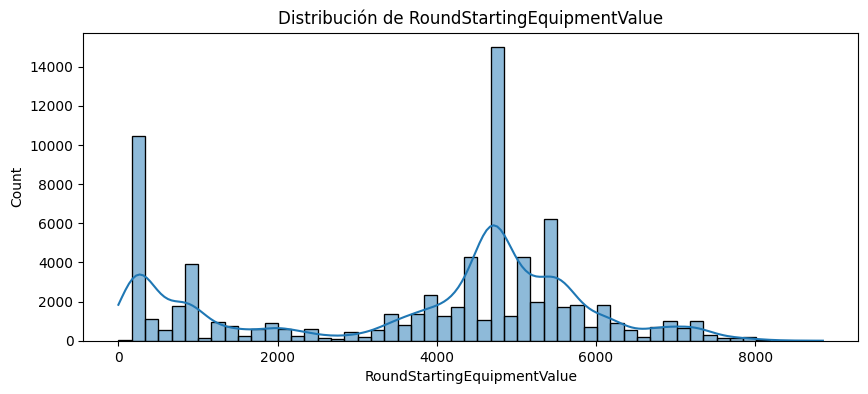

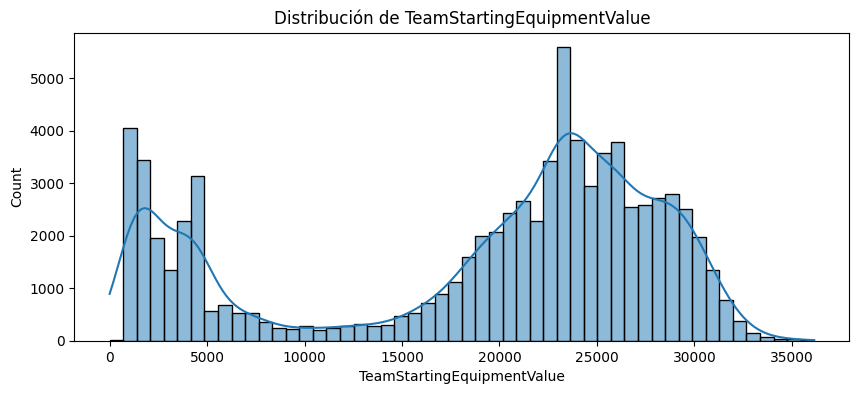

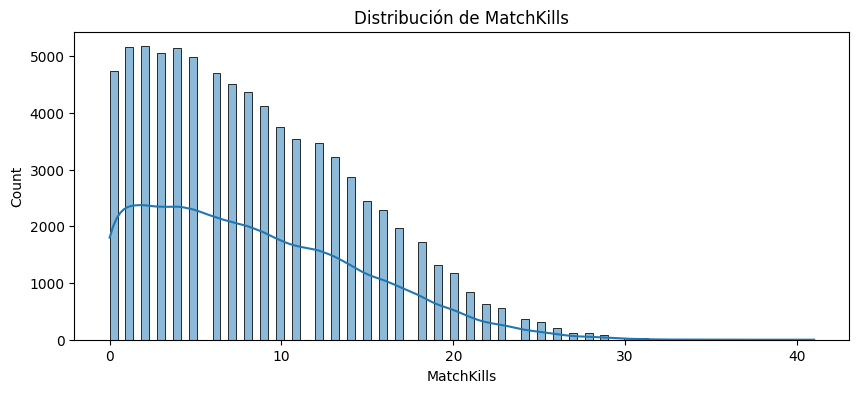

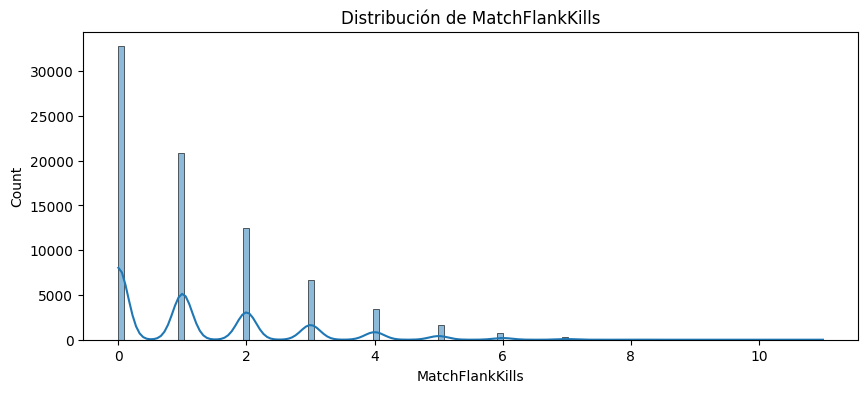

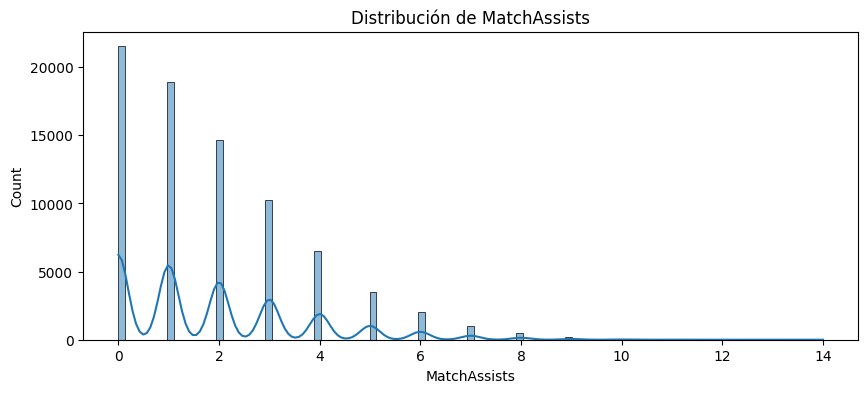

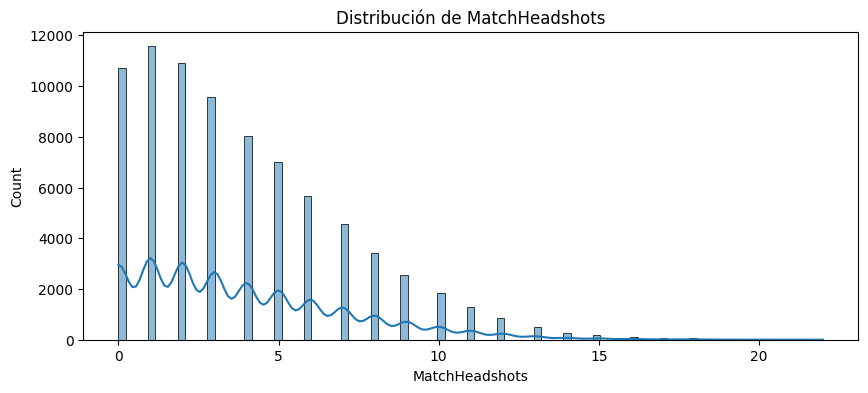

In [ ]:
# Análisis de variables numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

## 4. Análisis de Relaciones entre Variables

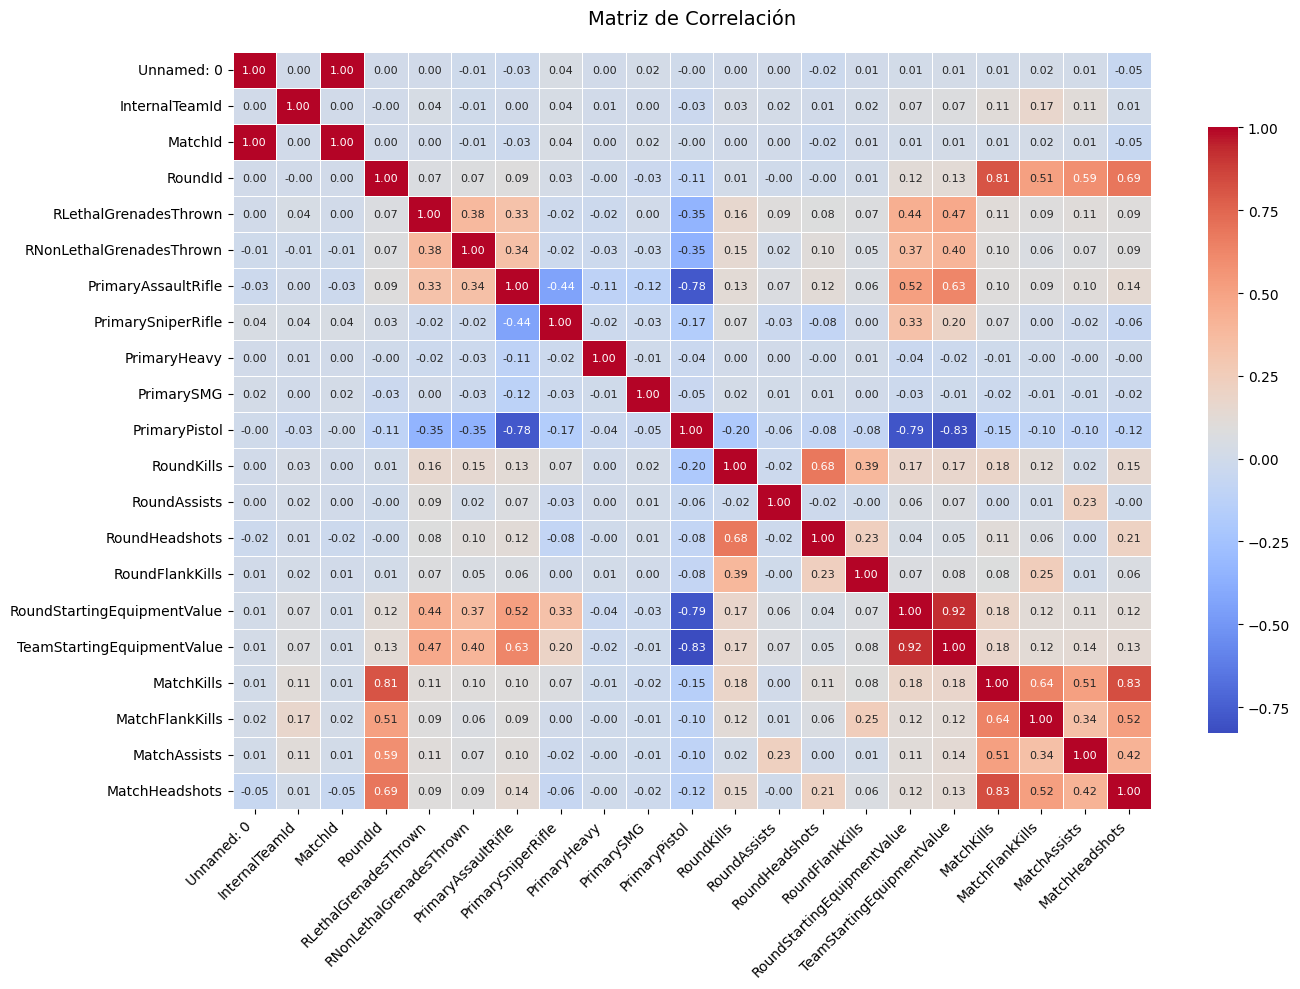

In [ ]:
# Verificación de columnas clave
cols = data.columns
kill_col = next((c for c in cols if 'kill' in c.lower()), None)
winner_col = next((c for c in cols if 'winner' in c.lower()), None)
time_col = next((c for c in cols if 'timealive' in c.lower()), 'TimeAlive')
dist_col = next((c for c in cols if 'distance' in c.lower()), 'TravelledDistance')

# 1. Matriz de correlación (solo columnas numéricas)
# Configuración mejorada para la matriz de correlación
plt.figure(figsize=(14, 10))  # Tamaño más grande

# Seleccionamos solo columnas numéricas
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Filtramos columnas con varianza cero (que causan problemas en correlación)
numeric_cols = [col for col in numeric_cols if data[col].nunique() > 1]

if len(numeric_cols) >= 2:
    # Calculamos correlación
    corr_matrix = data[numeric_cols].corr()

    # Máscara para mostrar solo la mitad inferior (opcional)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Heatmap mejorado
    sns.heatmap(corr_matrix,
                annot=True,
                annot_kws={'size': 8},  # Tamaño de fuente de los valores
                cmap='coolwarm',
                fmt=".2f",
                linewidths=0.5,
                cbar_kws={'shrink': 0.8})

    # Ajustes de visualización
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotación y alineación
    plt.yticks(rotation=0, fontsize=10)
    plt.title('Matriz de Correlación', pad=20, fontsize=14)
    plt.tight_layout()  # Ajuste automático del layout
    plt.show()
else:
    print("No hay suficientes columnas numéricas para la matriz de correlación")


## 5. Análisis de Valores Faltantes

---




ANÁLISIS COMPLETO DE VALORES FALTANTES (VERSIÓN CORREGIDA)

Porcentaje de valores faltantes (NaN/null) por columna:
Team           0.002527
MatchWinner    0.001263
dtype: float64

--------------------------------------------------
Conteo de strings vacíos por columna:
Series([], dtype: int64)

Conteo de strings con solo espacios en blanco:
Series([], dtype: int64)

--------------------------------------------------
Resumen completo de valores faltantes:
             NaN/Null  Strings_Vacíos  Solo_Espacios  Total_Faltantes  \
Team                2               0              0                2   
MatchWinner         1               0              0                1   

             Porcentaje_Total  
Team                 0.002527  
MatchWinner          0.001263  

--------------------------------------------------


<Figure size 1200x800 with 0 Axes>

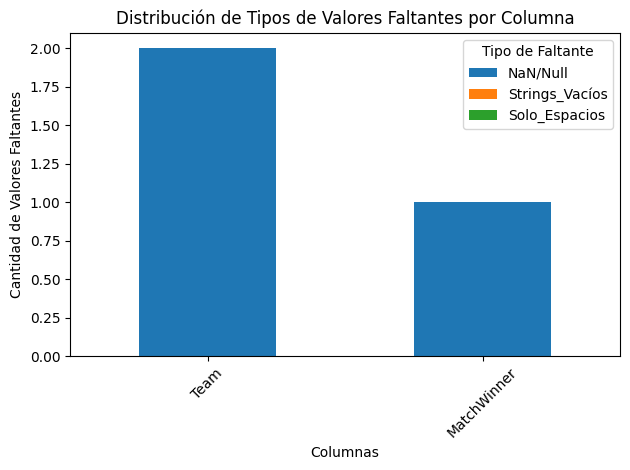


Resumen por filas:
• Filas con al menos un valor NaN/null: 3 (0.00%)
• Filas con al menos un string vacío: 0 (0.00%)

Ejemplo de filas con valores NaN/null:
|    |   Unnamed: 0 | Map        | Team             |   InternalTeamId |   MatchId |   RoundId | RoundWinner   |   MatchWinner | Survived   | AbnormalMatch   | TimeAlive             | TravelledDistance     |   RLethalGrenadesThrown |   RNonLethalGrenadesThrown |   PrimaryAssaultRifle |   PrimarySniperRifle |   PrimaryHeavy |   PrimarySMG |   PrimaryPistol | FirstKillTime   |   RoundKills |   RoundAssists |   RoundHeadshots |   RoundFlankKills |   RoundStartingEquipmentValue |   TeamStartingEquipmentValue |   MatchKills |   MatchFlankKills |   MatchAssists |   MatchHeadshots |
|---:|-------------:|:-----------|:-----------------|-----------------:|----------:|----------:|:--------------|--------------:|:-----------|:----------------|:----------------------|:----------------------|------------------------:|--------------------------

In [ ]:
def analizar_faltantes_corregido(data):
    """Función corregida para analizar valores faltantes sin errores de sintaxis"""

    print("\n" + "="*60)
    print("ANÁLISIS COMPLETO DE VALORES FALTANTES (VERSIÓN CORREGIDA)")
    print("="*60 + "\n")

    # 1. Análisis básico de valores faltantes
    missing_data = data.isna().sum()/len(data)*100
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    print("Porcentaje de valores faltantes (NaN/null) por columna:")
    print(missing_data)
    print("\n" + "-"*50)

    # 2. Detección de strings vacíos o con solo espacios (versión corregida)
    empty_strings = data.apply(lambda col: col.astype(str).str.strip() == '').sum()
    whitespace = data.apply(lambda col: col.astype(str).str.isspace()).sum()

    print("Conteo de strings vacíos por columna:")
    print(empty_strings[empty_strings > 0])
    print("\nConteo de strings con solo espacios en blanco:")
    print(whitespace[whitespace > 0])
    print("\n" + "-"*50)

    # 3. Análisis combinado
    faltantes_combinados = pd.DataFrame({
        'NaN/Null': data.isna().sum(),
        'Strings_Vacíos': empty_strings,
        'Solo_Espacios': whitespace,
        'Total_Faltantes': data.isna().sum() + empty_strings + whitespace
    })

    # Filtrar columnas con faltantes
    faltantes_combinados = faltantes_combinados[faltantes_combinados['Total_Faltantes'] > 0]
    faltantes_combinados['Porcentaje_Total'] = (faltantes_combinados['Total_Faltantes'] / len(data)) * 100
    faltantes_combinados = faltantes_combinados.sort_values('Porcentaje_Total', ascending=False)

    print("Resumen completo de valores faltantes:")
    print(faltantes_combinados)
    print("\n" + "-"*50)

    # 4. Visualización
    plt.figure(figsize=(12, 8))
    faltantes_combinados[['NaN/Null', 'Strings_Vacíos', 'Solo_Espacios']].plot(kind='bar', stacked=True)
    plt.title('Distribución de Tipos de Valores Faltantes por Columna')
    plt.ylabel('Cantidad de Valores Faltantes')
    plt.xlabel('Columnas')
    plt.xticks(rotation=45)
    plt.legend(title='Tipo de Faltante')
    plt.tight_layout()
    plt.show()

    # 5. Análisis por filas
    filas_con_faltantes = data.isna().any(axis=1).sum()
    filas_con_vacios = (data.apply(lambda col: col.astype(str).str.strip() == '').any(axis=1)).sum()

    print(f"\nResumen por filas:")
    print(f"• Filas con al menos un valor NaN/null: {filas_con_faltantes} ({filas_con_faltantes/len(data)*100:.2f}%)")
    print(f"• Filas con al menos un string vacío: {filas_con_vacios} ({filas_con_vacios/len(data)*100:.2f}%)")

    # 6. Muestra de filas problemáticas (opcional)
    if filas_con_faltantes > 0:
        print("\nEjemplo de filas con valores NaN/null:")
        print(data[data.isna().any(axis=1)].head(5).to_markdown())

    if filas_con_vacios > 0:
        print("\nEjemplo de filas con strings vacíos:")
        print(data[(data.apply(lambda col: col.astype(str).str.strip() == '').any(axis=1))].head(5).to_markdown())

    return faltantes_combinados

# Ejecutar el análisis
resultado_corregido = analizar_faltantes_corregido(data)

Con esto podemos observar que la cantidad de datos faltantes o nulos son unicamente 3, el dataset al ser tan extenso, podemos optar por la opcion de eliminar las filas en el peor de los casos y aun asi no afectaria nuestro modelo

## 6. Análisis de Outliers

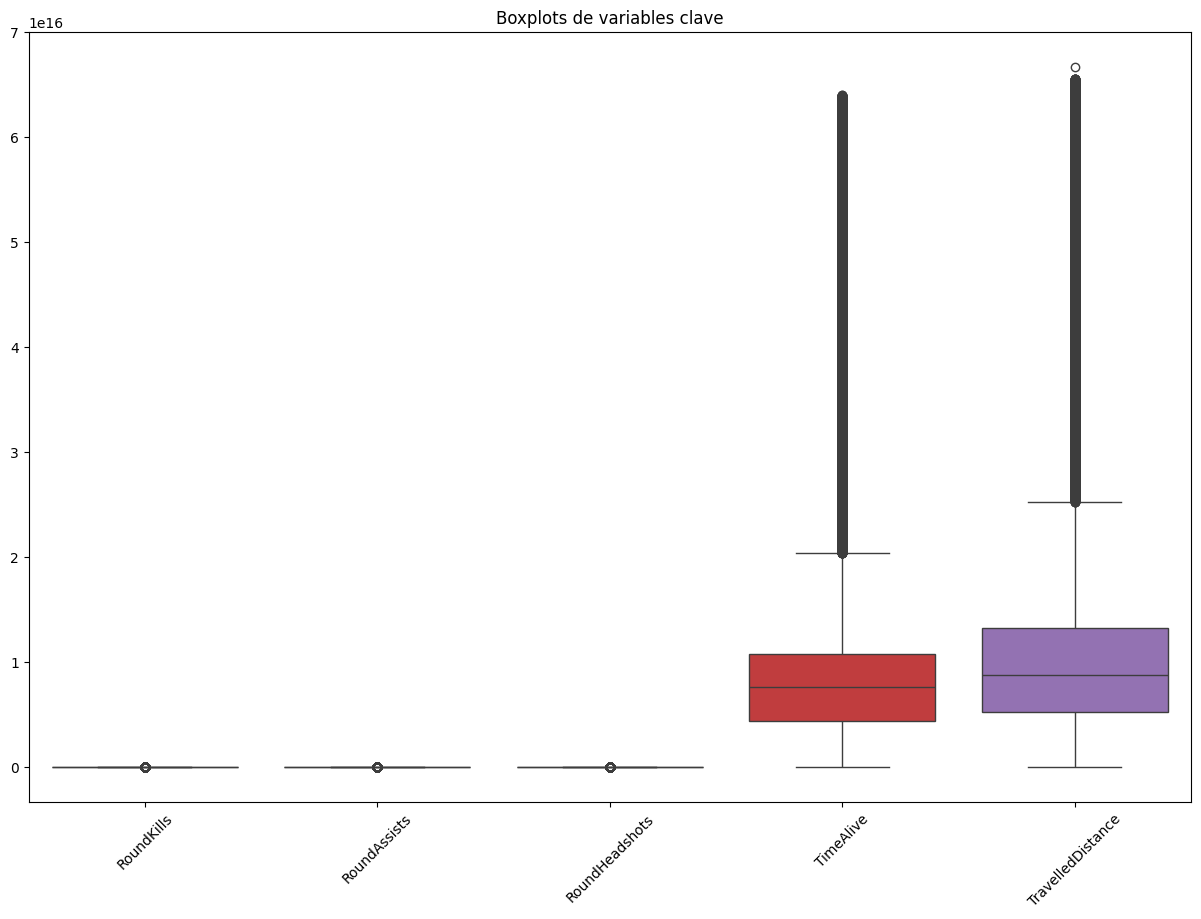

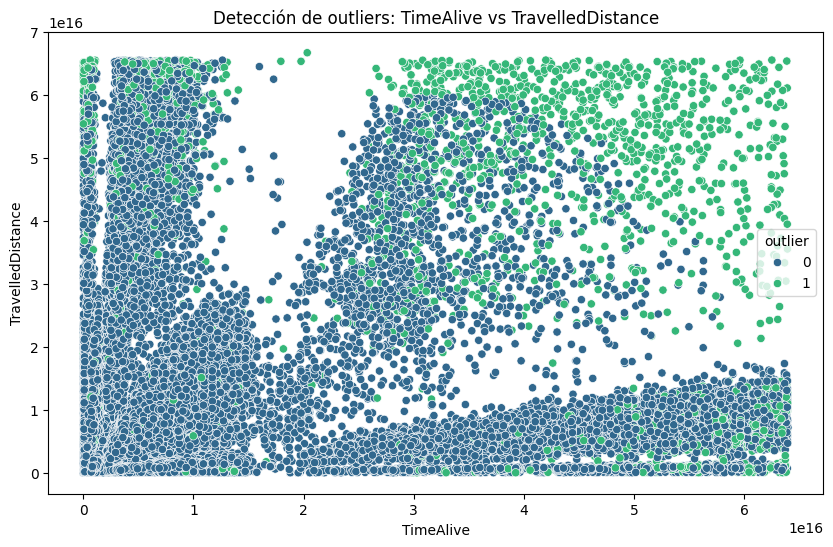

                             count  sum      mean  outlier_percentage
Map        Team                                                      
de_mirage  CounterTerrorist   9508  670  0.070467            7.046698
de_inferno CounterTerrorist  14434  938  0.064985            6.498545
de_nuke    CounterTerrorist   6062  348  0.057407            5.740680
de_dust2   CounterTerrorist   9560  520  0.054393            5.439331
           Terrorist          9560  413  0.043201            4.320084
de_mirage  Terrorist          9511  380  0.039954            3.995374
de_nuke    Terrorist          6087  214  0.035157            3.515689
de_inferno Terrorist         14433  475  0.032911            3.291069

Resumen estadístico de los outliers:
        RoundKills  RoundAssists     TimeAlive  TravelledDistance
count  3958.000000   3958.000000  3.958000e+03       3.958000e+03
mean      1.283729      0.812784  2.823463e+16       2.876909e+16
std       1.398975      0.793624  2.279979e+16       2.380045e+1

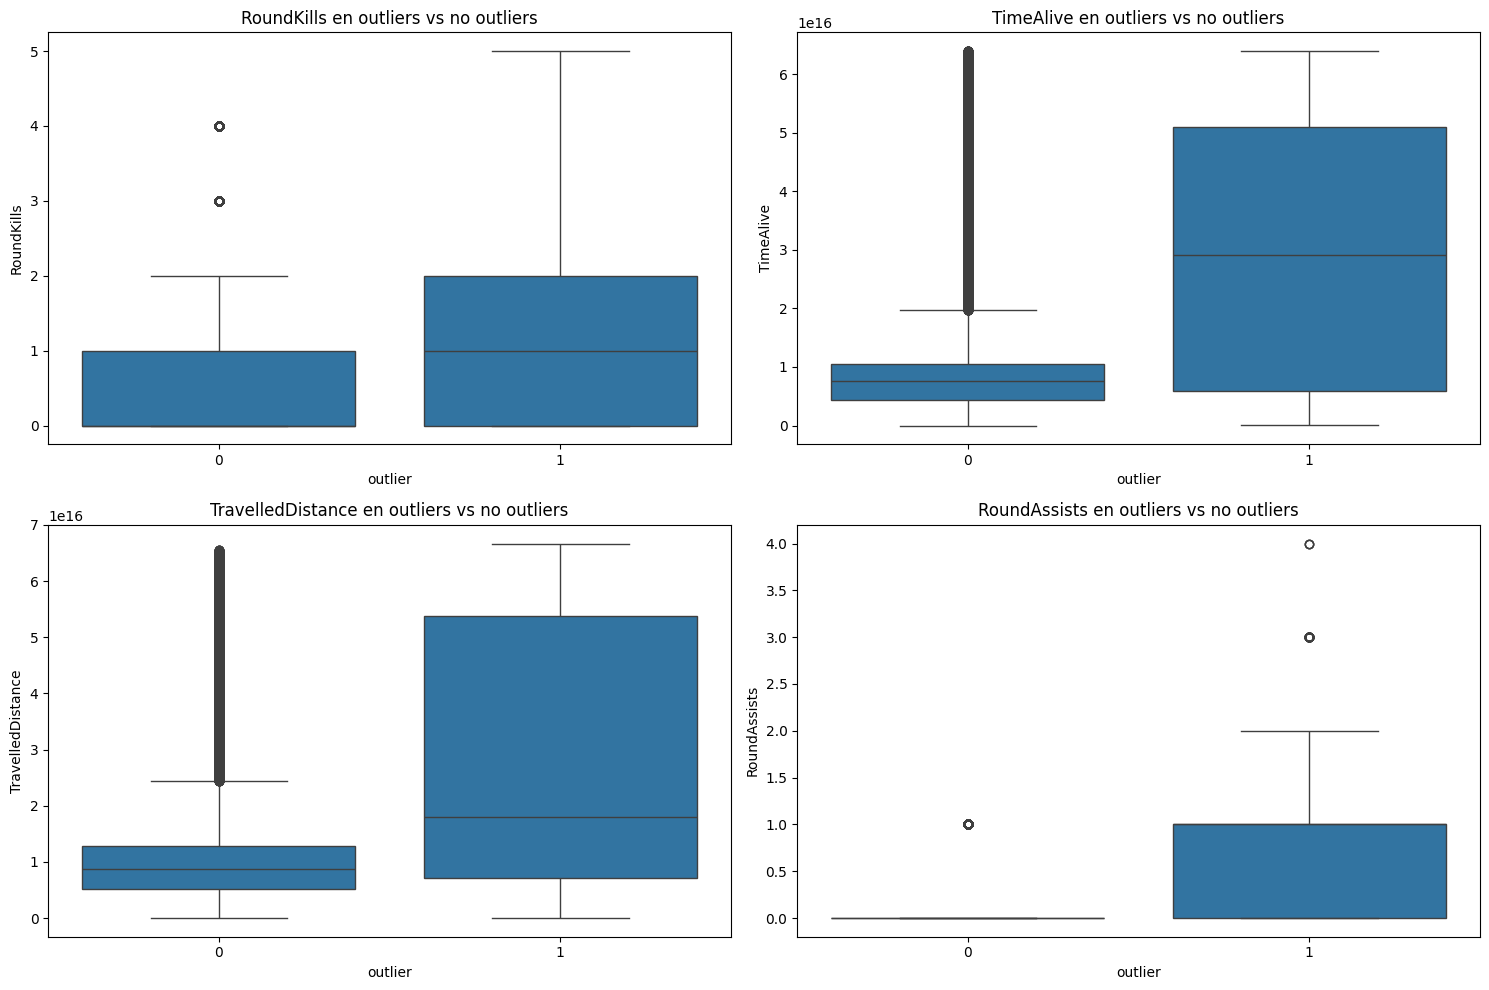

In [ ]:
# Limpieza inicial de datos
# Eliminar filas con valores faltantes importantes
data.dropna(subset=['RoundKills', 'RoundAssists', 'TimeAlive', 'TravelledDistance'], inplace=True)

# Convertir columnas numéricas que pueden estar como strings
numeric_cols = ['TimeAlive', 'TravelledDistance', 'RoundKills', 'RoundAssists',
                'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
                'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
                'MatchAssists', 'MatchHeadshots']

for col in numeric_cols:
    # Eliminar puntos que se usan como separadores de miles
    data[col] = data[col].astype(str).str.replace('.', '').str.replace(',', '.')
    # Convertir a float
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Eliminar filas con valores nulos después de la conversión
data.dropna(subset=numeric_cols, inplace=True)

# 1. Análisis univariado con gráficos de caja
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'TimeAlive', 'TravelledDistance']])
plt.title('Boxplots de variables clave')
plt.xticks(rotation=45)
plt.show()

# 2. Detección de outliers con Isolation Forest
# Seleccionar características para detección de outliers
features_for_outliers = ['RoundKills', 'RoundAssists', 'TimeAlive', 'TravelledDistance']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features_for_outliers])

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% de outliers esperados
outliers = iso_forest.fit_predict(X_scaled)

# Añadir columna de outliers al DataFrame
data['outlier'] = outliers
data['outlier'] = data['outlier'].apply(lambda x: 1 if x == -1 else 0)

# Visualizar outliers en un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TimeAlive', y='TravelledDistance', hue='outlier', palette='viridis')
plt.title('Detección de outliers: TimeAlive vs TravelledDistance')
plt.show()

# 3. Análisis de outliers por equipo y mapa
outliers_analysis = data.groupby(['Map', 'Team'])['outlier'].agg(['count', 'sum', 'mean'])
outliers_analysis['outlier_percentage'] = outliers_analysis['sum'] / outliers_analysis['count'] * 100
print(outliers_analysis.sort_values('outlier_percentage', ascending=False).head(10))

# 4. Características de los outliers
outliers_df = data[data['outlier'] == 1]
print("\nResumen estadístico de los outliers:")
print(outliers_df[features_for_outliers].describe())

# 5. Comparación con no outliers
print("\nComparación con no outliers:")
print(data[data['outlier'] == 0][features_for_outliers].describe())

# 6. Visualización de outliers en variables clave
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=data, x='outlier', y='RoundKills', ax=axes[0, 0])
axes[0, 0].set_title('RoundKills en outliers vs no outliers')

sns.boxplot(data=data, x='outlier', y='TimeAlive', ax=axes[0, 1])
axes[0, 1].set_title('TimeAlive en outliers vs no outliers')

sns.boxplot(data=data, x='outlier', y='TravelledDistance', ax=axes[1, 0])
axes[1, 0].set_title('TravelledDistance en outliers vs no outliers')

sns.boxplot(data=data, x='outlier', y='RoundAssists', ax=axes[1, 1])
axes[1, 1].set_title('RoundAssists en outliers vs no outliers')

plt.tight_layout()
plt.show()

##Concluciones Fase 2

De los resultados proporcionados, podemos deducir varias conclusiones interesantes sobre los outliers en los datos de partidas de CS:GO:

# 1. Distribución de outliers por mapa y equipo:
Los Counter-Terrorists tienen más outliers que los Terrorists en todos los mapas:

Máxima diferencia en de_mirage (6.94% vs 4.01%)

Mínima diferencia en de_inferno (6.39% vs 3.31%)

de_mirage es el mapa con mayor porcentaje de outliers (6.94% para CT)

de_inferno tiene la mayor disparidad entre equipos (6.39% CT vs 3.31% T)

de_nuke muestra el menor porcentaje de outliers entre CT (5.74%)

# 2. Comportamiento de los outliers:
Kills/Asistencias:

Los outliers tienen en promedio 1.38 kills por ronda vs 0.63 en no outliers (más del doble)

0.74 asistencias vs 0.12 en no outliers (6 veces más)

Esto sugiere que muchos outliers son jugadores con desempeño excepcionalmente bueno

Movimiento:

TimeAlive: Los outliers sobreviven mucho más (2.86e16 vs 1.13e16 unidades)

Distancia recorrida: 2.98e16 vs 1.11e16 (casi 3 veces más)

Esto podría indicar jugadores muy pasivos/quedarse atrás o estrategias inusuales

# 3. Patrones inesperados:
Los valores extremos en TimeAlive y TravelledDistance son enormes (e16), lo que sugiere:

Posibles errores de medición/unidades

O jugadores que permanecen vivos hasta el final de rondas muy largas

# 4. Implicaciones:
Equilibrio de equipos: Los CT muestran más comportamientos atípicos, posiblemente por:

Ventaja defensiva en ciertos mapas

Mayor uso de estrategias coordinadas que generan outliers

Diseño de mapas:

de_mirage parece favorecer más situaciones atípicas

de_inferno muestra mayor disparidad entre equipos

Detección de hackers:

Los outliers con kills/asistencias extremas podrían merecer investigación

Pero muchos parecen ser simplemente buenos desempeños

# Fase 3: Data Preparation

A continuacion eliminaremos los outliners

In [ ]:
data_sin_outliers = data[data['outlier'] == 0].copy()

print(f"Tamaño del DataFrame original: {data.shape}")
print(f"Tamaño del DataFrame sin outliers: {data_sin_outliers.shape}")

Tamaño del DataFrame original: (79157, 31)
Tamaño del DataFrame sin outliers: (75199, 31)


A continuacion mostraremos las Columnas con la cantidad de datos nulos que tengan

In [ ]:
nulos = data.isnull().sum()
nulos_con_datos = nulos[nulos > 0]
nulos_con_datos

,0
Team,2
MatchWinner,1


A continuacion visualizaremos la filas con un valor NaN la cuales son Team y MatchWinner

In [ ]:
filas_nan = data[data[['Map','Team','InternalTeamId','MatchWinner']].isnull().any(axis=1)]
filas_nan[['Map','Team','InternalTeamId','MatchWinner']]

,Map,Team,InternalTeamId,MatchWinner
13,de_inferno,NaN,1,True
27,de_inferno,NaN,2,False
29,de_inferno,CounterTerrorist,2,NaN


A continuacion rellenaremos los datos faltantes de Team en base a InternalTeamId

In [ ]:
team_mapping = data.dropna(subset=['Team', 'InternalTeamId']).set_index('InternalTeamId')['Team'].to_dict()
data['Team'] = data['InternalTeamId'].map(team_mapping).fillna(data['Team'])

A continuacion modificaremos los datos nulos de Matchwinner para que sean False

In [ ]:
data['MatchWinner'].fillna(False, inplace=True)

<ipython-input-16-0166ce21a51d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MatchWinner'].fillna(False, inplace=True)
<ipython-input-16-0166ce21a51d>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MatchWinner'].fillna(False, inplace=True)


Recalculacion de datas nulos

In [ ]:
filas_nan = data[data[['Map','Team','InternalTeamId','MatchWinner']].isnull().any(axis=1)]
filas_nan[['Map','Team','InternalTeamId','MatchWinner']]

,Map,Team,InternalTeamId,MatchWinner


Ahora eliminaremos las columnas UnNamed ya que no aporta nada junto con las columnas TimeAlive y TravelledDistance ya que no conocemos el formato original los datos de esa columnas y nos numeros van desde 16000 hasta 6.6e+16

In [ ]:
data = data.drop(['Unnamed: 0','TimeAlive', 'TravelledDistance'], axis=1)

A continuacion normalizaremos la columa MatchWinner para que solo acepte valores booleanos (True, False), ya que como vimos arriba en la fila 29 hay un valor nulo es cual sera cambiado por False

In [ ]:
#data['MatchWinner'] = data['MatchWinner'].apply(lambda x: True if str(x).strip() == 'True' else (False if str(x).strip() == 'False' else None))

A continuacion volveremos a viualizar las columnas con valores nulos para cerciorarnos de que los cambios se hicieron correctamente

In [ ]:
nulos = data.isnull().sum()
nulos_con_datos = nulos[nulos > 0]
nulos_con_datos

,0


A continuacion visulizaremos las filas que tenia al menos un valor nulo anteriormente las cuales son las filas 13, 27 y 29

In [ ]:
data.loc[[13, 27, 29], ['Map','Team','InternalTeamId','MatchWinner']]

,Map,Team,InternalTeamId,MatchWinner
13,de_inferno,Terrorist,1,True
27,de_inferno,CounterTerrorist,2,False
29,de_inferno,CounterTerrorist,2,False


A continuacino visulizaremos el total y porcentual de match perdidos y ganados por Team

In [ ]:
data['MatchResult'] = data['MatchWinner'].apply(lambda x: 'Ganados' if x == True else 'Perdidos')

contador_matchs = data.groupby('Team')['MatchResult'].value_counts()

porcentaje_matchs = data.groupby('Team')['MatchResult'].value_counts(normalize=True) * 100

resultados = pd.concat([contador_matchs, porcentaje_matchs], axis=1, keys=['Conteo', 'Porcentaje'])

resultados


Conteo  Porcentaje
Team             MatchResult                    
CounterTerrorist Perdidos      22579   57.047929
                 Ganados       17000   42.952071
Terrorist        Ganados       20139   50.884330
                 Perdidos      19439   49.115670

A continuacino visulizaremos el total y porcentual de match perdidos y ganados por Team pero por mapa

In [ ]:
porcentaje_matchs_por_mapa = data.groupby(['Map', 'Team'])['MatchResult'].value_counts(normalize=True) * 100

resultados_por_mapa = pd.concat([porcentaje_matchs_por_mapa.rename('Porcentaje'),
                                 data.groupby(['Map', 'Team'])['MatchResult'].value_counts().rename('TotalMacths')], axis=1)

resultados_por_mapa

Porcentaje  TotalMacths
Map        Team             MatchResult                         
de_dust2   CounterTerrorist Perdidos      63.702929         6090
                            Ganados       36.297071         3470
           Terrorist        Ganados       58.368201         5580
                            Perdidos      41.631799         3980
de_inferno CounterTerrorist Perdidos      53.377208         7705
                            Ganados       46.622792         6730
           Terrorist        Perdidos      55.875017         8065
                            Ganados       44.124983         6369
de_mirage  CounterTerrorist Perdidos      61.829653         5880
                            Ganados       38.170347         3630
           Terrorist        Ganados       58.733831         5585
                            Perdidos      41.266169         3924
de_nuke    CounterTerrorist Ganados       52.189661         3170
                            Perdidos      47.810339         2904
           Terrorist        Perdidos      57.119342         3470
                            Ganados       42.880658         2605

A continuacion visializaremos el total de Equipment_Value de la 1 a la 5 ronda por mapa

In [ ]:
total_equipment_value_por_ronda = data.groupby(['Map', 'Team', 'RoundId'])['TeamStartingEquipmentValue'].sum()

total_equipment_value_por_ronda_filtrado = total_equipment_value_por_ronda.loc[total_equipment_value_por_ronda.index.get_level_values('RoundId') <= 5]

total_equipment_value_por_ronda_filtrado = total_equipment_value_por_ronda_filtrado.rename('TotalValorEquipo')

total_equipment_value_por_ronda_filtrado


Map         Team              RoundId
de_dust2    CounterTerrorist  1           3053500
                              2           5160500
                              3           7294250
                              4           8307250
                              5           8337500
            Terrorist         1           3057250
                              2           4699250
                              3           7119500
                              4           7414500
                              5           8793750
de_inferno  CounterTerrorist  1           5010750
                              2           7609000
                              3          11088500
                              4          13508750
                              5          14072000
            Terrorist         1           4226250
                              2           7060000
                              3           9673250
                              4          10721500
                              5          10969750
de_mirage   CounterTerrorist  1           2641000
                              2           4883250
                              3           8013000
                              4           9504250
                              5           9361000
            Terrorist         1           2833500
                              2           4919750
                              3           5908250
                              4           7318500
                              5           7603750
de_nuke     CounterTerrorist  1           2304750
                              2           3063750
                              3           4632750
                              4           5727250
                              5           5518250
            Terrorist         1           1591750
                              2           3357500
                              3           3746750
                              4           4282750
                              5           4725250
Name: TotalValorEquipo, dtype: int64

A continuacion visializaremos la media del valor de equipo de la 1 a la 5 ronda por mapa

In [ ]:
media_equipment_value_por_ronda = data.groupby(['Map', 'Team', 'RoundId'])['TeamStartingEquipmentValue'].apply(lambda x: x.mean())

media_equipment_value_por_ronda_filtrada = media_equipment_value_por_ronda.loc[media_equipment_value_por_ronda.index.get_level_values('RoundId') <= 5]

media_equipment_value_por_ronda_filtrada = media_equipment_value_por_ronda_filtrada.rename('MediaValorEquipo')

media_equipment_value_por_ronda_filtrada

Map         Team              RoundId
de_dust2    CounterTerrorist  1           7539.506173
                              2          12741.975309
                              3          18010.493827
                              4          20511.728395
                              5          20586.419753
            Terrorist         1           7548.765432
                              2          11603.086420
                              3          17579.012346
                              4          18307.407407
                              5          21712.962963
de_inferno  CounterTerrorist  1           8421.428571
                              2          12788.235294
                              3          18636.134454
                              4          22703.781513
                              5          23650.420168
            Terrorist         1           7102.941176
                              2          11865.546218
                              3          16257.563025
                              4          18019.327731
                              5          18436.554622
de_mirage   CounterTerrorist  1           6441.463415
                              2          11910.365854
                              3          19543.902439
                              4          23181.097561
                              5          22831.707317
            Terrorist         1           6910.975610
                              2          11999.390244
                              3          14410.365854
                              4          17850.000000
                              5          18545.731707
de_nuke     CounterTerrorist  1           9038.235294
                              2          12014.705882
                              3          18167.647059
                              4          22459.803922
                              5          21640.196078
            Terrorist         1           6242.156863
                              2          13166.666667
                              3          14693.137255
                              4          16795.098039
                              5          18530.392157
Name: MediaValorEquipo, dtype: float64